In [3]:
import numpy as np
import pandas as pd

Задача1

In [4]:
# количество наблюдений
n = 10

x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)

In [5]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
b


2.620538882402765

In [6]:
a = np.mean(y) - b * np.mean(x)
a

444.1773573243596

In [7]:
r = b * np.std(x) / np.std(y)
r

0.8874900920739162

In [8]:
R2 = r**2
R2

0.7876386635293682

In [9]:
y_pred = a + b * x
y_pred


array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [10]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
A_mean

11.46925184356171

In [11]:
mse_ = np.sum((y_pred - y)**2)/n
mse_

6470.414201176658

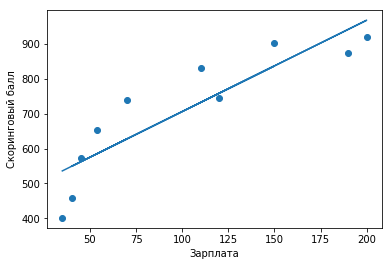

In [65]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.plot(x, y_pred)
plt.xlabel('Зарплата')
plt.ylabel('Скоринговый балл')
plt.show()

Задача2

In [84]:
def mse_(W1, x, y, W0=0 ,n=10):
    return np.sum((W1*x + W0 - y)**2)/n

In [80]:
alpha = 1e-6

In [94]:
W1 = 0.1
f_p = (2/n) * np.sum((W1*x - y)*x)
min_mse = float('inf') 
min_W1 = 0
for i in range(10000):
    W1 -= alpha * f_p
    mse = mse_(W1, x, y)
    if (mse < min_mse):
        min_mse = mse
        min_W1 = W1
    if i % 1000 == 0:
        print(f'Iteration: {i}, w1={W1}, mse={mse}')
print(f'минимум mse={min_mse}, оптимальное w1={min_W1}')
        

Iteration: 0, w1=0.25952808000000005, mse=493237.7212546963
Iteration: 1000, w1=159.78760808000104, mse=326348799.7218318
Iteration: 2000, w1=319.31568807999093, mse=1353411488.0877092
Iteration: 3000, w1=478.8437680799637, mse=3081681302.8186617
Iteration: 4000, w1=638.3718480799365, mse=5511158243.914764
Iteration: 5000, w1=797.8999280799093, mse=8641842311.376013
Iteration: 6000, w1=957.428008079882, mse=12473733505.202412
Iteration: 7000, w1=1116.956088079855, mse=17006831825.39396
Iteration: 8000, w1=1276.4841680798277, mse=22241137271.950653
Iteration: 9000, w1=1436.0122480798004, mse=28176649844.872486
минимум mse=56547.0447792607, оптимальное w1=5.843010880000002


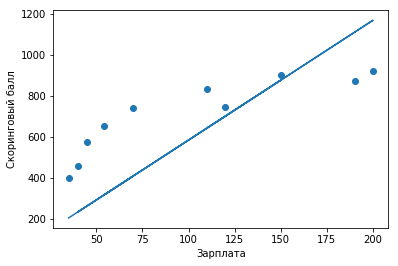

In [82]:
plt.scatter(x, y)
plt.plot(x, min_W1*x)
plt.xlabel('Зарплата')
plt.ylabel('Скоринговый балл')
plt.show()

Задача3

Если оценка дисперсии (или среднеквадратичного отклонения) получена из большой выборки n > 100, то используется таблица Лапласа. Если количество наблюдений n - среднее (30 < n < 100), то отличия незначительны. 
Если сигма (оценка среднеквадратичного отклонения) вычисляется на основании небольшой выборки n <= 30, то погрешность значительна и используется таблица Стьюдента.

Задача4

In [90]:
step_W1 = 1e-6
step_W0 = 1e-5

In [95]:
W1 = 0.1
W0 = 0
f_p = (2/n) * np.sum((W1*x + W0 - y)*x)
print(f_p)
min_mse = float('inf') 
min_W1 = 0
for i in range(1000):
    W0 = 0
    W1 -= step_W1 * f_p
    for j in range(1000):
        mse = mse_(W1, x, y, W0)
        if (mse < min_mse):
            min_mse = mse
            min_W1 = W1
            min_W0 = W0
        W0 -= step_W0 * f_p    
print(f'минимум mse={min_mse}, оптимальные w1={min_W1} и w0={min_W0}')
        

-159528.08000000002
минимум mse=6474.387619576805, оптимальные w1=2.65244928 и w0=440.2975008000022


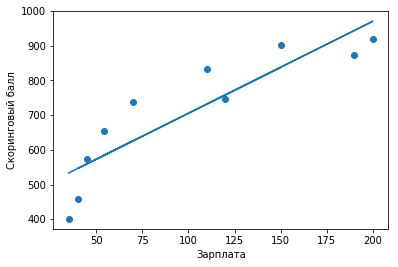

In [96]:
plt.scatter(x, y)
plt.plot(x, min_W1*x + min_W0)
plt.xlabel('Зарплата')
plt.ylabel('Скоринговый балл')
plt.show()